In [1]:
import torch
from optimize_ARPDF import ARPDFModel, ARPDFOptimizer
from collections import Counter
import MDAnalysis as mda
import utils
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

c:\Users\swz\anaconda3\envs\torch_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
X, Y, ARPDF_exp = utils.load_exp_data('data/CCl4', rmax=9.0)
u0 = mda.Universe('data/CCl4/CCl4.gro')
device = torch.device('cuda')
ARPDF_optimizer = ARPDFOptimizer(
    X, Y, ARPDF_exp, Counter(u0.atoms.types), cutoff=10.0, 
    lr=0.01, gamma=0.995, f_lb=-0.9, s=0.0, beta=0.0, epochs=500, device=device
)
ARPDF_optimizer.set_system(cur_dir='tmp/cos_sim')

In [7]:
# print(json.dumps({k: str(type(v)) for k, v in ARPDF_optimizer.__dict__.items()}, indent=4))
# print(json.dumps({k: str(type(v)) for k, v in ARPDF_optimizer.model.__dict__.items()}, indent=4))

lr: 0.009950
Epoch 0, Loss: -0.487655, CosSim: 0.153578
lr: 0.009704
Epoch 5, Loss: -0.552108, CosSim: 0.196423
lr: 0.009464
Epoch 10, Loss: -0.566014, CosSim: 0.223658
lr: 0.009229
Epoch 15, Loss: -0.572682, CosSim: 0.233221
lr: 0.009001
Epoch 20, Loss: -0.576913, CosSim: 0.236869
lr: 0.008778
Epoch 25, Loss: -0.583502, CosSim: 0.218971
lr: 0.008561
Epoch 30, Loss: -0.587499, CosSim: 0.218167
lr: 0.008349
Epoch 35, Loss: -0.592233, CosSim: 0.220095
lr: 0.008142
Epoch 40, Loss: -0.599024, CosSim: 0.211867
lr: 0.007941
Epoch 45, Loss: -0.603480, CosSim: 0.200135
lr: 0.007744
Epoch 50, Loss: -0.607080, CosSim: 0.187583
lr: 0.007553
Epoch 55, Loss: -0.610176, CosSim: 0.182149
lr: 0.007366
Epoch 60, Loss: -0.614568, CosSim: 0.176559
lr: 0.007183
Epoch 65, Loss: -0.618859, CosSim: 0.179048
lr: 0.007005
Epoch 70, Loss: -0.621279, CosSim: 0.182941
lr: 0.006832
Epoch 75, Loss: -0.621293, CosSim: 0.180140
lr: 0.006663
Epoch 80, Loss: -0.624470, CosSim: 0.181656
lr: 0.006498
Epoch 85, Loss: -0.6

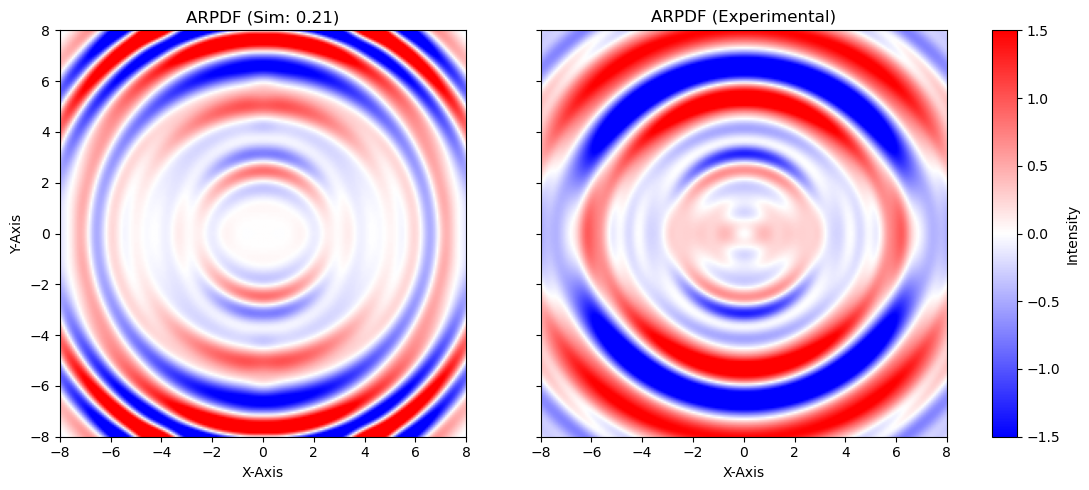

In [8]:
ARPDF_optimizer.optimize()

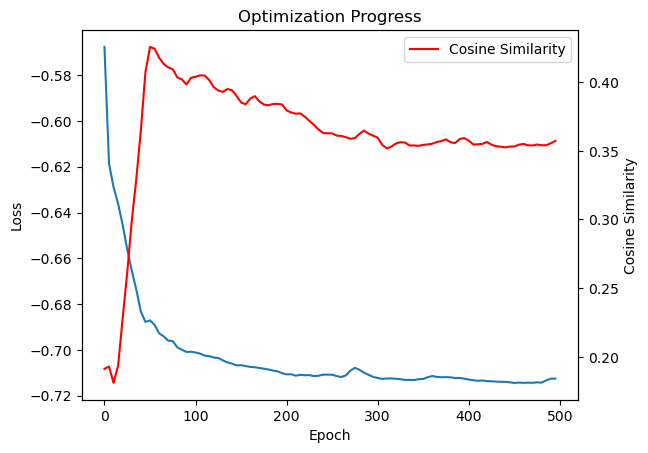

In [9]:
df = pd.read_csv("tmp/circ_sim_wc_6/log.txt")
epochs = df['epoch'].values
loss = df['loss'].values
cos_sim = df['cos_sim'].values
plt.plot(epochs, loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.twinx()
plt.plot(epochs, cos_sim, label='Cosine Similarity', color='red')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.title('Optimization Progress')
plt.show()